In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

import neuro_op as nop

In [2]:
nop.plot_setup()
cmap = "inferno"

# Purpose

Analyse behaviour of a single node in neuro_op's framework.

Scanned dimensions:
- $\mu\in [0.0,1.0,...,5.0]$
- $\sigma\in [0.5,1,5,10]$

In [3]:
def get_name(mu, sd):
    return str(
        "../testing/2024-06--1--ConjMu-N0/"
        + "out-N1-mu-"
        + str(round(mu / 1.0, 3))
        + "-sd-"
        + str(sd)
        + ".h5"
    )


def get_kld(mu, sd):
    data = nop.import_hdf5(get_name(mu, sd))
    return data["kl_divs"][:, 0]


def get_mu(mu, sd):
    data = nop.import_hdf5(get_name(mu, sd))
    return data["mu_nodes"][:, 0]

In [31]:
# Create xarray dataset with the following dimensions:
# - time
# - mu
# - sigma (standard deviation sd)

mu0_arr = np.arange(0.0, 5.1, 1.0)
sd_arr = [0.5, 1, 2, 5, 10]
t_arr = np.arange(0, 10001, 1)
mu_arr = np.zeros((len(mu0_arr), len(sd_arr), len(t_arr)))
kld_arr = np.zeros((len(mu0_arr), len(sd_arr), len(t_arr)))

for i, mu in enumerate(mu0_arr):
    for j, sd in enumerate(sd_arr):
        mu_arr[i, j] = get_mu(mu, sd)[: len(t_arr)]
        kld_arr[i, j, :] = get_kld(mu, sd)[: len(t_arr)]

da_mu = xr.DataArray(
    mu_arr,
    dims=["mu", "sd", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "time": t_arr},
)
da_kld = xr.DataArray(
    kld_arr,
    dims=["mu", "sd", "time"],
    coords={"mu": mu0_arr, "sd": sd_arr, "time": t_arr},
)

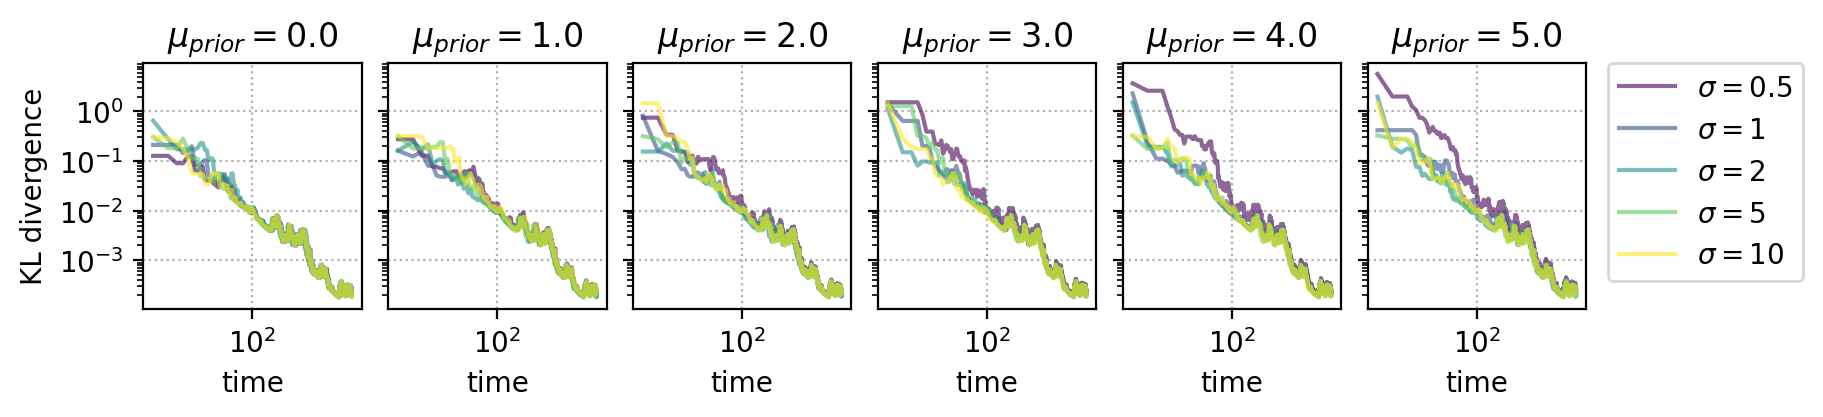

In [32]:
fig, ax = plt.subplots(1, len(mu0_arr), figsize=(9, 4), sharex=True, sharey=True)
for i, mu in enumerate(mu0_arr):
    ax[i].set_prop_cycle(color=nop.get_colorcycle(len(sd_arr)))
    for j, sd in enumerate(sd_arr):
        ax[i].plot(
            da.coords["time"][1:], da[i, j, 1:], label="$\sigma=$" + str(sd), alpha=0.6
        )
        ax[i].loglog()
        ax[i].grid(linestyle=":")
    if i == 0:
        ax[i].set_ylabel("KL divergence")
    if i == len(mu0_arr) - 1:
        ax[i].legend(loc="upper left", bbox_to_anchor=(1.1, 1), borderaxespad=0.0)

    ax[i].set_xlabel("time")
    ax[i].set_title("$\mu_{prior}=$" + str(mu))
    ax[i].set_aspect("equal")

fig.savefig("N1-KLD.png")

/tmp/ipykernel_84037/2957806201.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend(loc='upper left', bbox_to_anchor=(1.1, 1), borderaxespad=0.)


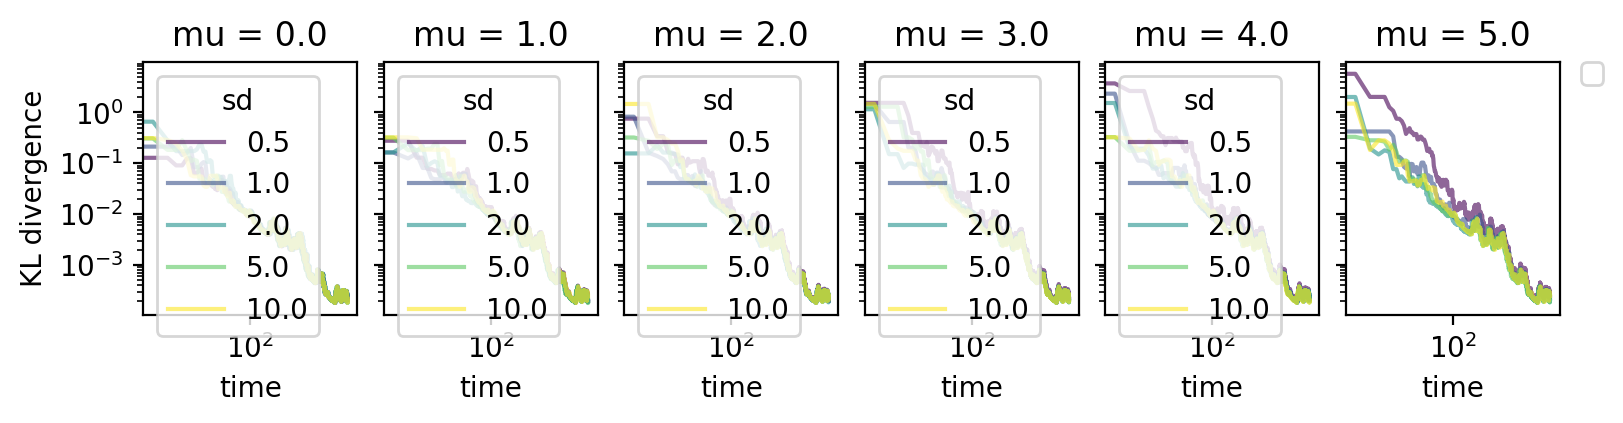

In [37]:
fig, ax = plt.subplots(1, len(mu0_arr), figsize=(8, 2), sharex=True, sharey=True)

for i, mu in enumerate(mu0_arr):
    ax[i].set_prop_cycle(color=nop.get_colorcycle(len(sd_arr)))
    da_kld.sel(mu=mu).plot(ax=ax[i], x="time", hue="sd", alpha=0.6)
    ax[i].loglog()

/home/jens/conda/envs/neuro_op/lib/python3.11/site-packages/xarray/plot/facetgrid.py:673: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout()


AttributeError: 'FacetGrid' object has no attribute 'set_xscale'

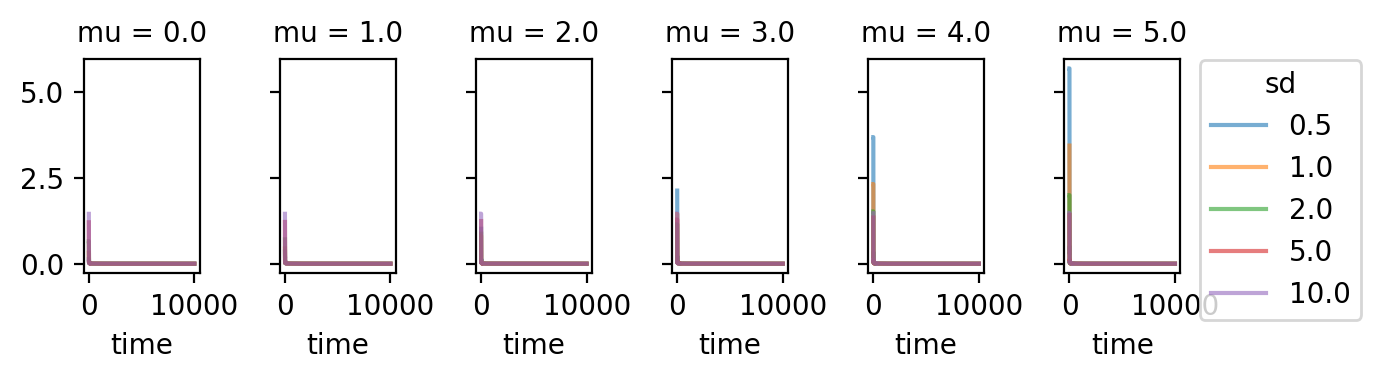

In [47]:
fg = da_kld.plot(x="time", hue="sd", col="mu", alpha=0.6, figsize=(6, 2))
fg.set_xscale("log")